# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [137]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
import spacy
from spacy import displacy
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
lemmatizer = WordNetLemmatizer()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\amuni\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [138]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amuni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amuni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amuni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [6]:
# Read your api key environment variable
load_dotenv("example.env")
api_key = os.getenv("NEWS_API_KEY")
#print(api_key)

In [8]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [202]:
# Fetch the Bitcoin news articles
all_articles_bitcoin = newsapi.get_everything(q='bitcoin',
                                      from_param='2020-08-15',
                                      to='2020-08-31',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)


In [203]:
# Fetch the Ethereum news articles
all_articles_ethereum = newsapi.get_everything(q='ethereum',
                                      from_param='2020-08-01',
                                      to='2020-08-31',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)

In [17]:
#all_articles_bitcoin

In [204]:
# Define function that accepts an newsapi object and returns a sentiment dataframe
def sentiments_meter(newsapi_object):
    #sentiment_df = pd.DataFrame.from_dict(all_articles_bitcoin["articles"])
    sentiments_list = []
    for article in newsapi_object["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments_list.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu

            })
        
        except AttributeError:
            pass
    sentiment_df = pd.DataFrame(sentiments_list)
    # Reorder DataFrame columns
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    sentiment_df = sentiment_df[cols]
    return(sentiment_df)   

In [205]:
# Create the Bitcoin sentiment scores DataFrame
bitcoinsentiment=sentiments_meter(all_articles_bitcoin)
bitcoinsentiment.head()

,date,text,compound,positive,negative,neutral
0,2020-08-20,A Lincolnshire sheep farmer has been convicted...,0.0000,0.000,0.000,1.000
1,2020-08-20,WASHINGTON (Reuters) - A former chief security...,0.0772,0.072,0.093,0.836
2,2020-08-27,(Reuters) - The U.S. government sought on Thur...,0.0000,0.000,0.000,1.000
3,2020-08-27,(Reuters) - The U.S. government sought on Thur...,0.0000,0.000,0.000,1.000
4,2020-08-19,"Phone spear phishing"" attacks have been on the...",-0.8658,0.000,0.222,0.778


In [206]:
# Create the Ethereum sentiment scores DataFrame
ethereumsentiment=sentiments_meter(all_articles_ethereum)
ethereumsentiment.head()

,date,text,compound,positive,negative,neutral
0,2020-08-01,Chaturbate executive Shirely Lara is a sex ind...,0.0000,0.000,0.000,1.000
1,2020-08-18,Bitcoins prices were off from Mondays high. Me...,0.0000,0.000,0.000,1.000
2,2020-08-25,Bitcoin is looking bearish while Ethereum mine...,0.0000,0.000,0.000,1.000
3,2020-08-10,Ethereum Classic developers were still licking...,-0.0772,0.103,0.084,0.813
4,2020-08-05,"WarGames, a movie from 1983, stars a young Mat...",-0.1531,0.056,0.075,0.870


In [207]:
# Describe the Bitcoin Sentiment
bitcoinsentiment.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,-0.089747,0.070632,0.079947,0.849526
std,0.472146,0.066834,0.078189,0.104402
min,-0.865800,0.000000,0.000000,0.588000
25%,-0.527200,0.014500,0.000000,0.777500
50%,0.000000,0.054000,0.085000,0.836000
75%,0.236850,0.128000,0.089000,0.882000
max,0.790100,0.210000,0.294000,1.000000


In [208]:
# Describe the Ethereum Sentiment
ethereumsentiment.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.161439,0.071667,0.033778,0.894611
std,0.401507,0.074837,0.049530,0.084583
min,-0.690800,0.000000,0.000000,0.730000
25%,0.000000,0.000000,0.000000,0.835250
50%,0.101150,0.074500,0.000000,0.903500
75%,0.466650,0.101000,0.070000,0.980250
max,0.817600,0.270000,0.169000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has highest mean positive score (0.079947) vs. Ethereum (0.051500)

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

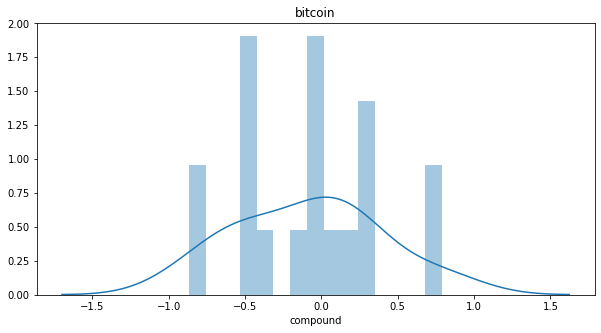

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.distplot(bitcoinsentiment['compound'], bins=15, ax=ax).set_title('bitcoin')
plt.show()

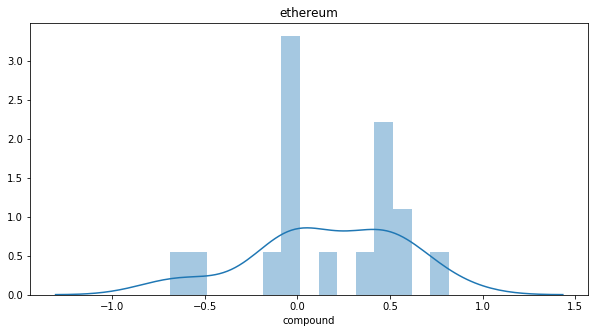

In [210]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.distplot(ethereumsentiment['compound'], bins=15, ax=ax).set_title('ethereum')
plt.show()

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [125]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import en_core_web_sm

In [11]:
# Expand the default stopwords list if necessary


In [211]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Extract named entities like US and Hong Kong which are not printing correctly (as two words etc.)
    nlp = en_core_web_sm.load()
    nel_list=[]
    doc=nlp(text)
    entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE']]
    
    for entity in entities:
        text = text.replace(entity,"") 
        
    #Word tokenize text and convert to lower
    text=word_tokenize(text.lower())

    # Remove the punctuation using REGEX
    regex = re.compile("[^a-zA-Z ]")
    text=[regex.sub('', word) for word in text]
    
    # Remove stop words
    sw = set(stopwords.words('english'))
    # Added reuters,chars and url as stop words
    sw_addon = {'reuters','url','chars'}
    text = [word.lower() for word in text if word.lower() not in sw.union(sw_addon)]
    
    # Lemmatize Words into root words
    text = [lemmatizer.lemmatize(word) for word in text]
    
    #Combine entities extracted. After converting entities to lower case
    entities = [ent.lower() for ent in entities]
    text= text + entities
    
    #Remove nulls from list
    text=list(filter(None, text))
   
    return text

In [212]:
# Create a new tokens column for Bitcoin
bitcoinsentiment['token']=bitcoinsentiment['text'].apply(tokenizer)
bitcoinsentiment.head()

,date,text,compound,positive,negative,neutral,token
0,2020-08-20,A Lincolnshire sheep farmer has been convicted...,0.0000,0.000,0.000,1.000,"[sheep, farmer, convicted, two, count, contami..."
1,2020-08-20,WASHINGTON (Reuters) - A former chief security...,0.0772,0.072,0.093,0.836,"[former, chief, security, officer, uber, techn..."
2,2020-08-27,(Reuters) - The U.S. government sought on Thur...,0.0000,0.000,0.000,1.000,"[government, sought, thursday, seize, cryptocu..."
3,2020-08-27,(Reuters) - The U.S. government sought on Thur...,0.0000,0.000,0.000,1.000,"[government, sought, thursday, seize, cryptocu..."
4,2020-08-19,"Phone spear phishing"" attacks have been on the...",-0.8658,0.000,0.222,0.778,"[phone, spear, phishing, attack, rise, since, ..."


In [213]:
# Create a new tokens column for Ethereum
ethereumsentiment['token']=ethereumsentiment['text'].apply(tokenizer)
ethereumsentiment.head()

,date,text,compound,positive,negative,neutral,token
0,2020-08-01,Chaturbate executive Shirely Lara is a sex ind...,0.0000,0.000,0.000,1.000,"[chaturbate, executive, shirely, lara, sex, in..."
1,2020-08-18,Bitcoins prices were off from Mondays high. Me...,0.0000,0.000,0.000,1.000,"[price, monday, high, meanwhile, high, fee, et..."
2,2020-08-25,Bitcoin is looking bearish while Ethereum mine...,0.0000,0.000,0.000,1.000,"[looking, bearish, ethereum, miner, reaping, f..."
3,2020-08-10,Ethereum Classic developers were still licking...,-0.0772,0.103,0.084,0.813,"[ethereum, classic, developer, still, licking,..."
4,2020-08-05,"WarGames, a movie from 1983, stars a young Mat...",-0.1531,0.056,0.075,0.870,"[wargames, movie, star, young, matthew, broder..."


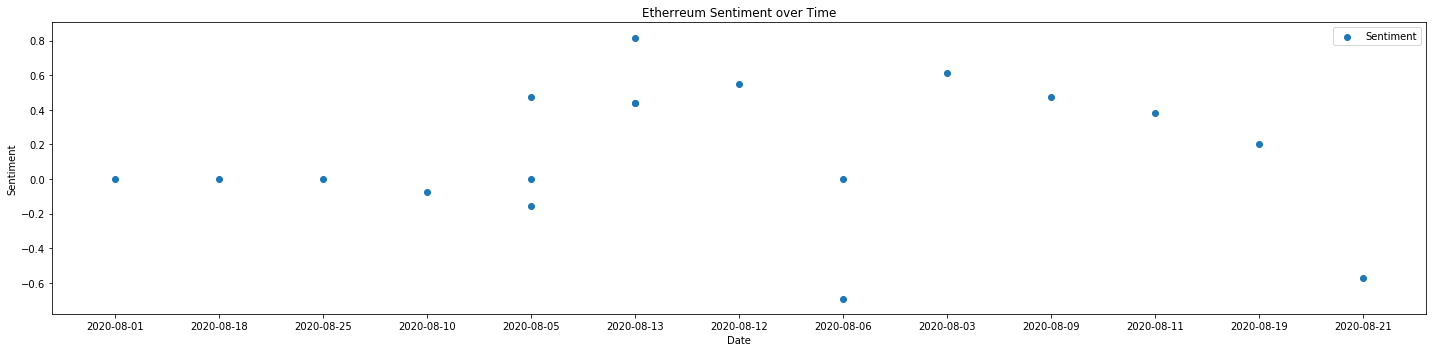

In [214]:
import datetime as dt
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(ethereumsentiment['date'],ethereumsentiment['compound'], label='Sentiment')
ax.set(title='Etherreum Sentiment over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.show()

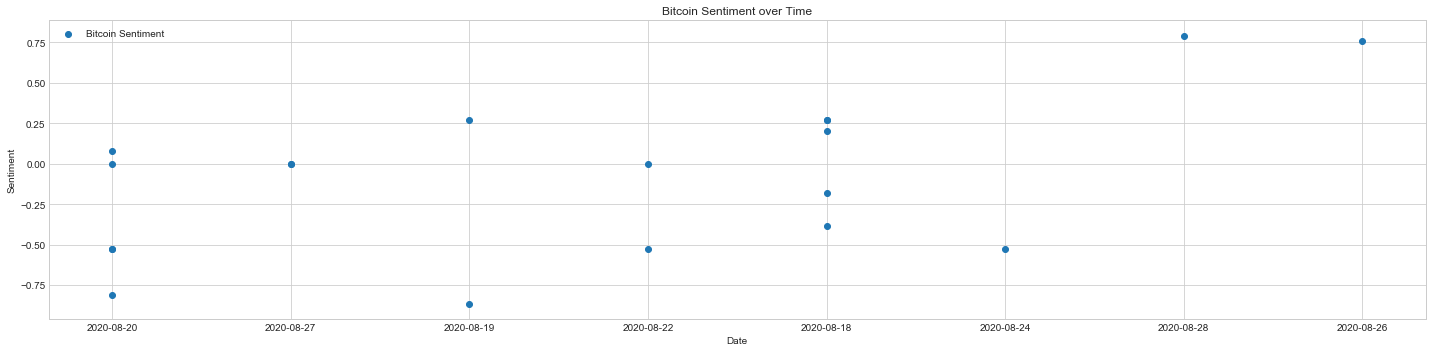

In [297]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(bitcoinsentiment['date'],bitcoinsentiment['compound'], label='Bitcoin Sentiment')

ax.set(title='Bitcoin Sentiment over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.show()

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [218]:
from collections import Counter
from nltk import ngrams


In [231]:
# Generate the Bitcoin N-grams where N=2
bitcoincorpus = [article["content"] for article in all_articles_bitcoin['articles']]
bitcoincorpus=list(filter(None, bitcoincorpus))
# Define the counter function

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_addon = {'reuters','url','char'}
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    return output

def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

bigram_counter(bitcoincorpus)
#bitcoincorpus

,bigram,count
0,"(wireless, charging)",6
1,"(isolationsite, doe)",4
2,"(doe, one)",4
3,"(one, thing)",4
4,"(thing, visit)",4
5,"(visit, urls)",4
6,"(urls, want)",4
7,"(want, check)",4
8,"(check, dont)",4
9,"(dont, trust)",4


In [232]:
# Generate the Ethereum N-grams where N=2
ethereumcorpus = [article["content"] for article in all_articles_ethereum['articles']]
ethereumcorpus=list(filter(None, ethereumcorpus))
bigram_counter(ethereumcorpus)

,bigram,count
0,"(decentralized, finance)",4
1,"(btc, trading)",2
2,"(trading, around)",2
3,"(ethereum, classic)",2
4,"(finance, defi)",2
5,"(sometimes, limitation)",2
6,"(omg, network)",2
7,"(chaturbate, executive)",1
8,"(executive, shirely)",1
9,"(shirely, lara)",1


In [240]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    big_string = ' '.join(tokens)
    processed = process_text(big_string)
    top_N = dict(Counter(processed).most_common(N))             
    return top_N

In [252]:
# Get the top 10 words for Bitcoin
Results_Bitcoin=dict(token_count(bitcoincorpus,10))

{'wireless': 6, 'charging': 6, 'dollar': 5, 'g': 5, 'two': 4, 'us': 4, 'cryptocurrency': 4, 'year': 4, 'isolationsite': 4, 'doe': 4}


In [253]:
# Get the top 10 words for Ethereum
Results_Ethereum=dict(token_count(ethereumcorpus,10))

{'ethereum': 11, 'network': 8, 'decentralized': 5, 'blockchain': 5, 'bitcoin': 4, 'ha': 4, 'finance': 4, 'coindesk': 3, 'fee': 3, 'around': 3}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [279]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

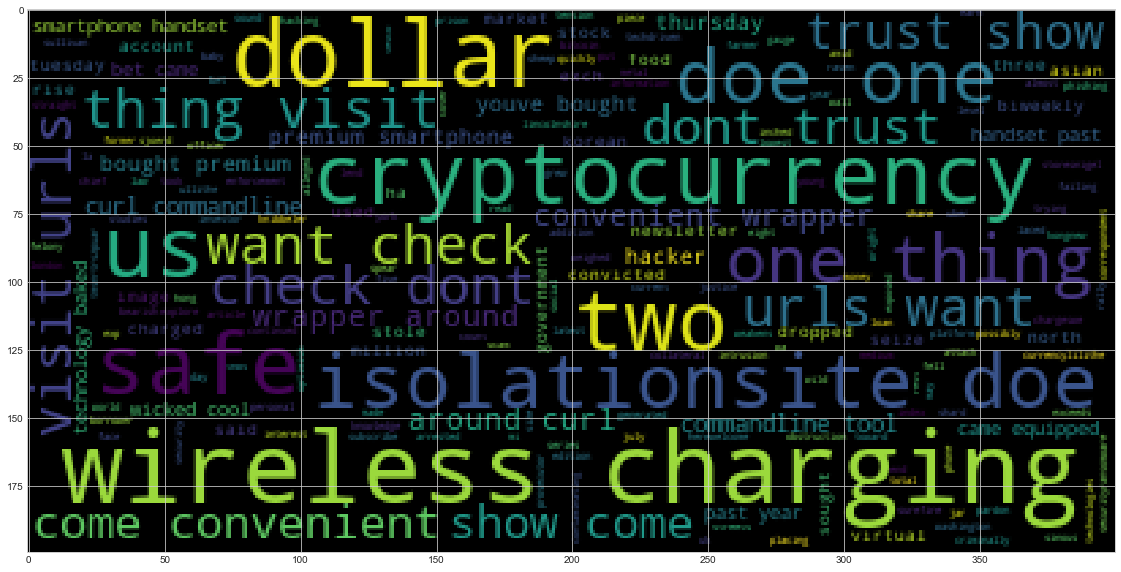

In [293]:
# Generate the Bitcoin word cloud
bitcoin_string = ' '.join(bitcoincorpus)
bitcoin_string=' '.join(process_text(bitcoin_string))
wc = WordCloud().generate(bitcoin_string)
plt.imshow(wc)

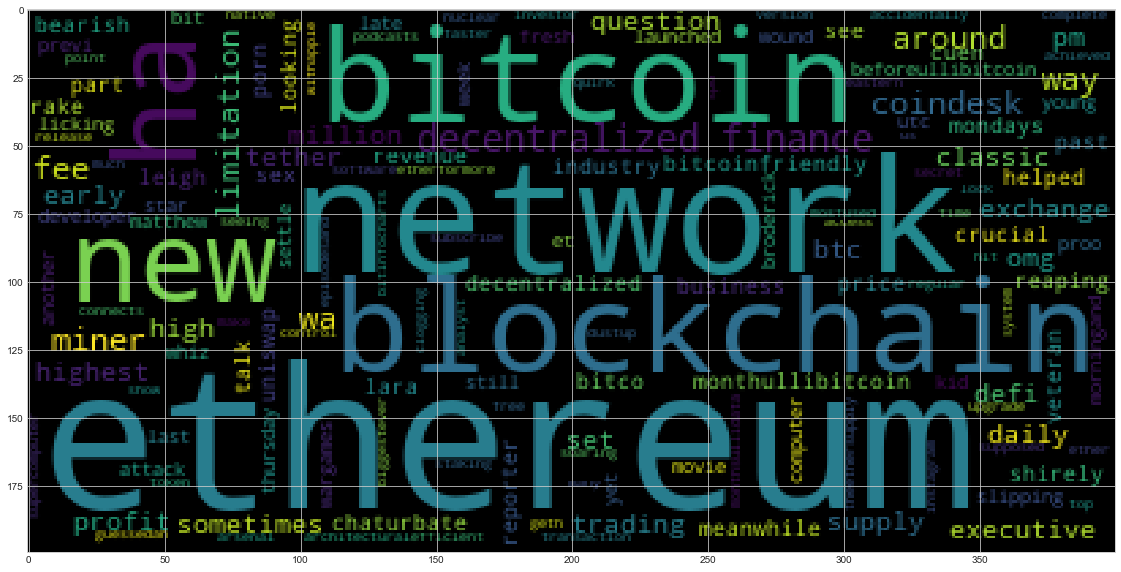

In [295]:
# Generate the Ethereum word cloud
ethereum_string = ' '.join(ethereumcorpus)
ethereum_string=' '.join(process_text(ethereum_string))
wc = WordCloud().generate(ethereum_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [254]:
import spacy
from spacy import displacy

In [25]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [257]:
# Load the spaCy model
nlp = en_core_web_sm.load()

---
### Bitcoin NER

In [267]:
# Concatenate all of the Bitcoin text together
Bitcoin_NER=nlp(' '.join(bitcoincorpus))

In [266]:
# Run the NER processor on all of the text
# Add a title to the document
# Rendered visualiziation

Bitcoin_NER.user_data["title"] = "BITCOIN NER"
displacy.render(Bitcoin_NER,style='ent')


In [270]:
# List all Entities in BitCoin
for ent in Bitcoin_NER.ents:
    print(ent.text, ent.label_)

Lincolnshire GPE
two CARDINAL
three CARDINAL
two CARDINAL
Tesco ORG
Nigel Wright PERSON
Market Rasen PERSON
WASHINGTON GPE
Reuters ORG
Uber Technologies ORG
Thursday DATE
2016 DATE
about 57 mi CARDINAL
Reuters ORG
U.S. GPE
Thursday DATE
280 CARDINAL
North Korean NORP
millions of dollars MONEY
two CARDINAL
Reuters ORG
U.S. GPE
Thursday DATE
280 CARDINAL
North Korean NORP
millions of dollars MONEY
two CARDINAL
July DATE
three CARDINAL
US GPE
UK GPE
Knibbeler PERSON
'Current Studies' WORK_OF_ART
2013-2016 DATE
Sullivan PERSON
up to eight years DATE
HONG KONG/NEW YORK GPE
Reuters ORG
Asian NORP
Tuesday DATE
Sino NORP
one CARDINAL
the past few years DATE
just one CARDINAL
the past few years DATE
the past few years DATE
just one CARDINAL
just one CARDINAL
ul><li PERSON
US NORP
May 2018 DATE
Tuesday DATE
five days DATE
weekly DATE
Pardon The Intrusion ORG
TNWs bi-weekly PERSON
LONDON GPE
Reuters ORG
about 20% PERCENT
Asian NORP
0.24% PERCENT
Chinese NORP
0.18% PERCENT
Buffet GPE


---

### Ethereum NER

In [276]:
# Concatenate all of the Ethereum text together
Ethereum_NER=nlp(' '.join(ethereumcorpus))

In [274]:
# List all Entities
# Entities in Ethereum - prints only GPE and ORG
for ent in Ethereum_NER.ents:
    if ent.label_ in ['GPE','ORG']:
        print(ent.text, ent.label_)

ul><li GPE
Bitcoin GPE
BTC ORG
Bitcoin GPE
Bitcoin GPE
BTC ORG
WarGames ORG
U.S. GPE
DeFi ORG
Bitmain GPE
Matic Network ORG
DeFi ORG
the Tor Network ORG
Bitcoin GPE
Twitter ORG
DisclosureThe ORG
DEFI ORG


---